# Goal:
Our goal for this project is to standardize the Clipper Ship foundation's data collection and analysis. Our idea is to provide a simple template for Clipper Ship to give to various organizations, which when filled out, will be used to easily generate visualizations and summaries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
orgs = set()
datadict = {
0:[],
1:[],
2:[],
3:[],
4:[],
5:[]
}

In [3]:
orgdict = {}


In [4]:
# LOOP THROUGH FILES, WILL BE DIFFERENT ON REPO
files = ["ClipperShipGrantData.json", "ClipperShipGrantData2.json", "ClipperShipGrantData3.json"]
for file in files:
    print(file)

ClipperShipGrantData.json
ClipperShipGrantData2.json
ClipperShipGrantData3.json


In [5]:
orgdict["Totals"] = pd.DataFrame(columns = ["Year", "Please Indicate The Amount Of Money Given By Clipper Ship", "Please Indicate The Amount Of Money Used By Clipper Ship", "Please indicate the number of Opportunity Youth (ages 16-24) placed into employment in FY' 23:", "As appropriate, please indicate the number of Opportunity Youth successfully placed into supported or permanent housing in FY' 23:", "Please Indicate Number Of Youth In Program", "Please Indicate Number Of Opportunity Youth achieving different educational milestones in FY' 23, such as HS diploma, GED, college matriculation"])
totaldict = dict()



Google
Brandeis
YO {2023: [300000, 3000000, 40000, 60000, 1000000, 30000]}
Google
2022
   Year  Please Indicate The Amount Of Money Given By Clipper Ship  \
3  2023                                             300000           

   Please Indicate The Amount Of Money Used By Clipper Ship  \
3                                            3000000          

   Please indicate the number of Opportunity Youth (ages 16-24) placed into employment in FY' 23:  \
3                                              40000                                                

   As appropriate, please indicate the number of Opportunity Youth successfully placed into supported or permanent housing in FY' 23:  \
3                                              60000                                                                                    

   Please Indicate Number Of Youth In Program  \
3                                     1000000   

   Please Indicate Number Of Opportunity Youth achieving different e

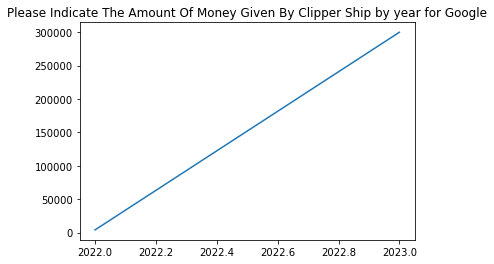

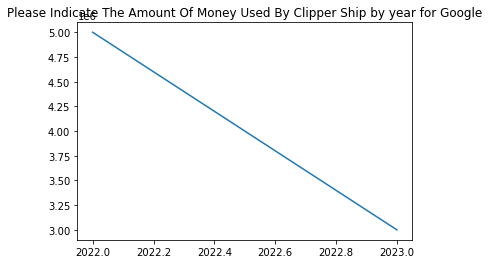

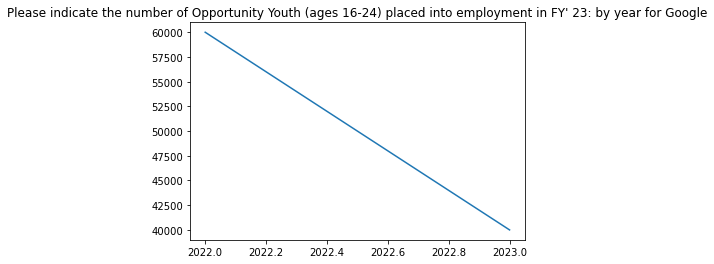

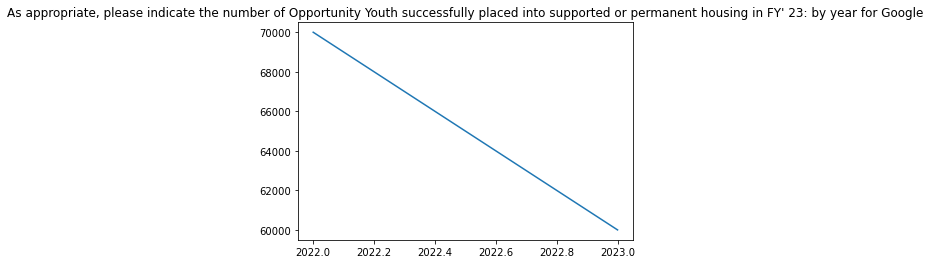

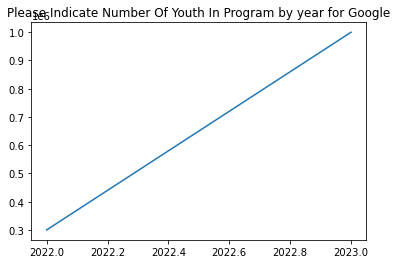

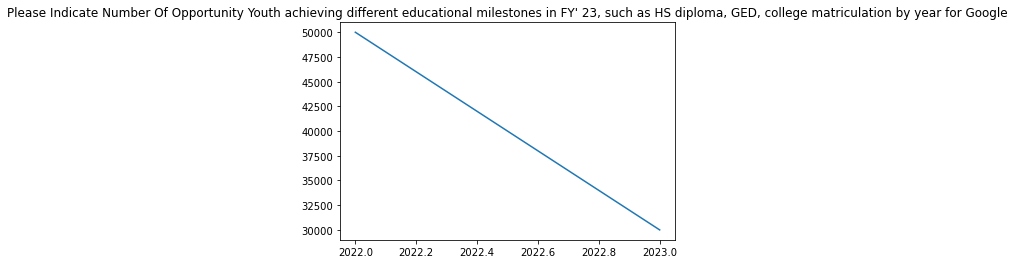

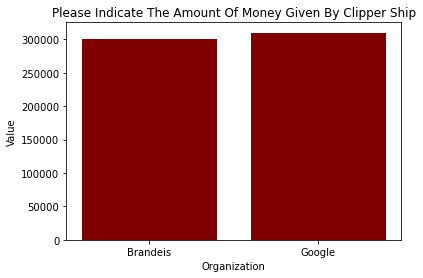

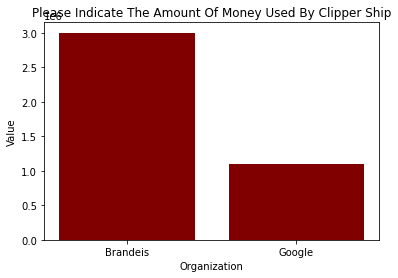

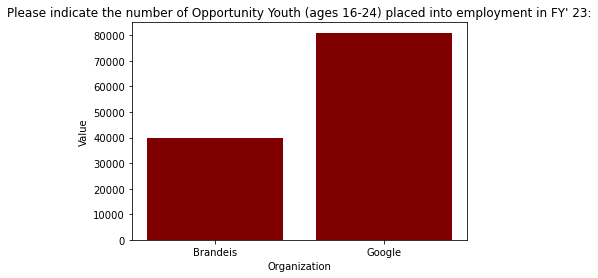

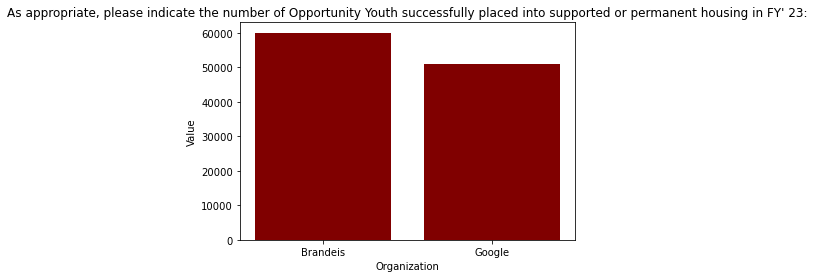

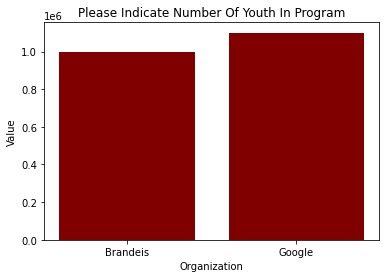

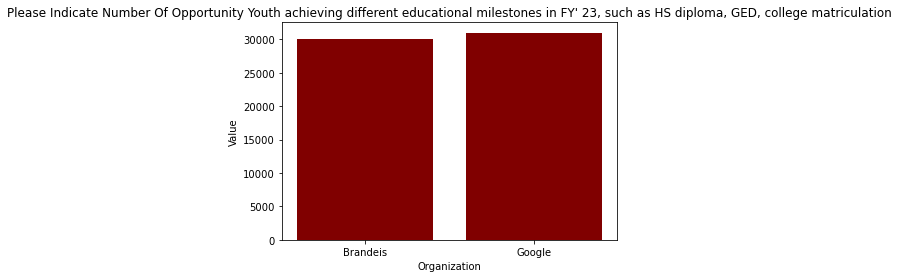

In [6]:
for file in files:
    
    

    
    jsondf = pd.read_json(file)
    dfdata = jsondf["data"].iloc[0]
    overalldata = dfdata[10:16]
    overalldf = pd.DataFrame(overalldata, columns=['Index', 'Question', 'Value'])
    overalldf = overalldf[['Question', 'Value']]



    specsdata = dfdata[5:9]
    specsdf = pd.DataFrame(specsdata, columns=['Index', 'Question', 'Value'])
    specsdf = specsdf[['Question', 'Value']]

    print(specsdf["Value"][0])


    if specsdf["Value"][0] not in orgs:
        name = specsdf['Value'][0]
        year = int(specsdf['Value'][3])
        orgs.add(name)
        for i in range(overalldf.shape[0]):
            question = overalldf['Question'][i]
            datadict[i].append(int(overalldf["Value"][i]))
           
                
                

    if specsdf['Value'][0] not in orgdict.keys():
        name = specsdf['Value'][0]
        orgdict[name] = pd.DataFrame(specsdf['Value'].iloc[3:4])
        orgdict.update({name: orgdict.get(name).rename(columns = {'Value': 'Year'})})
        if int(specsdf['Value'][3]) in totaldict.keys():
            print("YO", totaldict)
            for i in range(overalldf.shape[0]):
                orgdict.get(name)[overalldf['Question'][i]] = [int(overalldf["Value"][i])]
                totaldict.get(int(specsdf['Value'][3]))[i] += int(overalldf["Value"][i])
        else:
            totaldict[int(specsdf['Value'][3])] = []
            for i in range(overalldf.shape[0]):
                orgdict.get(name)[overalldf['Question'][i]] = [int(overalldf["Value"][i])]
                totaldict.get(int(specsdf['Value'][3])).append(int(overalldf['Value'][i]))
    
    
    else:
        newrow = [specsdf['Value'].iloc[3]]
        print(int(specsdf['Value'][3]))
        if int(specsdf['Value'][3]) in totaldict.keys():
            print("YOr", totaldict)
            for i in range(overalldf.shape[0]):
                newrow.append(int(overalldf["Value"][i]))
                totaldict.get(int(specsdf['Value'][3]))[i] += int(overalldf["Value"][i])
        else:
            totaldict[int(specsdf['Value'][3])] = []
            for i in range(overalldf.shape[0]):
                newrow.append(int(overalldf["Value"][i]))
                totaldict.get(int(specsdf['Value'][3])).append(int(overalldf['Value'][i]))
        print(orgdict.get("Google"))
        updatedf = orgdict.get(specsdf['Value'][0]) 
        updatedf.loc[len(updatedf.index)] = newrow
        updatedf['Year'] = updatedf['Year'].astype('int')
        orgdict.update({specsdf["Value"][0]: updatedf})
        print("HOOOHHHH", list(orgdict.get("Totals")['Year']))
    
 


for key in orgdict.keys():
    for j in range(overalldf.shape[0]):
        if len(orgdict.get(key)) > 1: #can use this line if you want to remove plots for companies with only one year
            plt.plot(orgdict.get(key)['Year'], orgdict.get(key)[overalldf['Question'][j]])
            plt.title(str(overalldf['Question'][j])+ " by year for "+ str(key))
            plt.show()

            
        
for i in range(overalldf.shape[0]):
    plt.bar(list(orgs), height = datadict[i], color = "maroon")
    plt.title(overalldf['Question'][i])
    plt.xlabel("Organization")
    plt.ylabel("Value")
    plt.show()




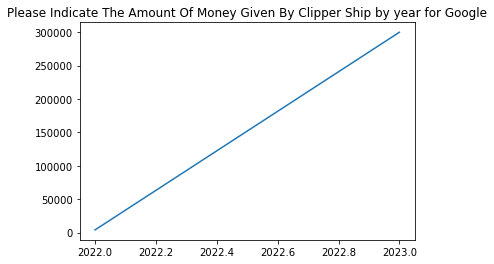

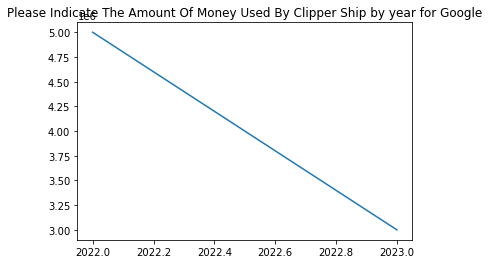

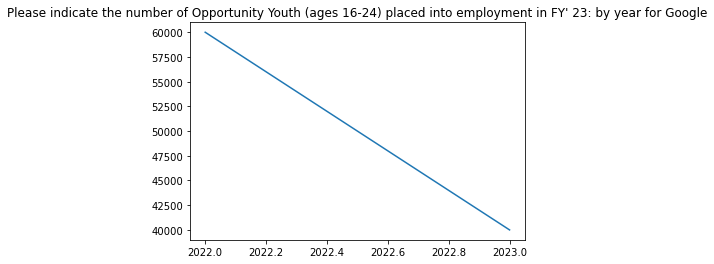

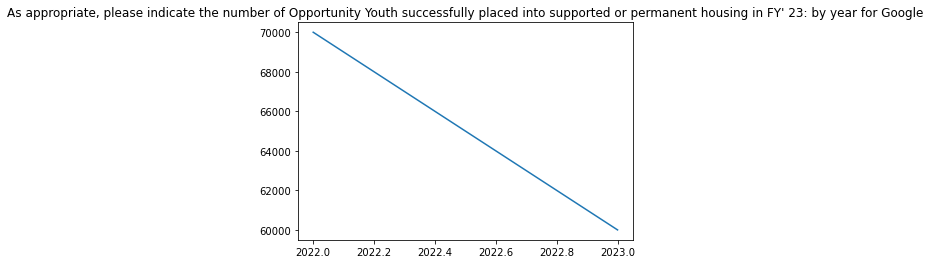

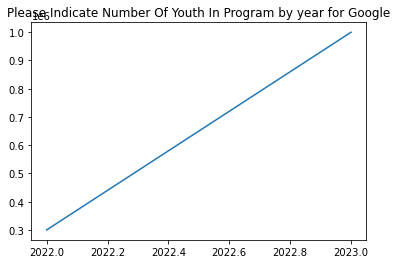

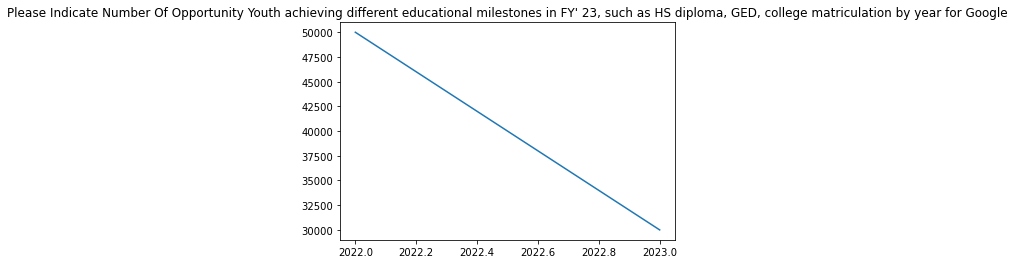

In [7]:
for key in orgdict.keys():
    for j in range(overalldf.shape[0]):
         if len(orgdict.get(key)) > 1: #can use this line if you want to remove plots for companies with only one year
            plt.plot(orgdict.get(key)['Year'], orgdict.get(key)[overalldf['Question'][j]])
            plt.title(str(overalldf['Question'][j])+ " by year for "+ str(key))
            plt.show()
            
            


In [9]:
totaldict

{2023: [610000, 4100000, 121000, 111000, 2100000, 61000],
 2022: [4000, 5000000, 60000, 70000, 300000, 50000]}

In [10]:
overalldf['Question']

0    Please Indicate The Amount Of Money Given By C...
1    Please Indicate The Amount Of Money Used By Cl...
2    Please indicate the number of Opportunity Yout...
3    As appropriate, please indicate the number of ...
4           Please Indicate Number Of Youth In Program
5    Please Indicate Number Of Opportunity Youth ac...
Name: Question, dtype: object

[2023, 2022]
[610000, 4000]


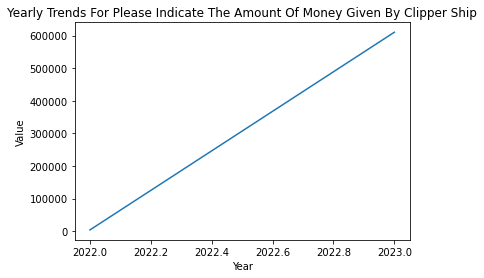

[2023, 2022]
[4100000, 5000000]


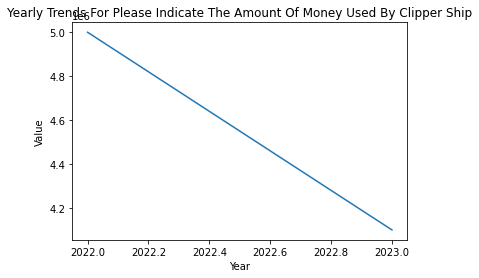

[2023, 2022]
[121000, 60000]


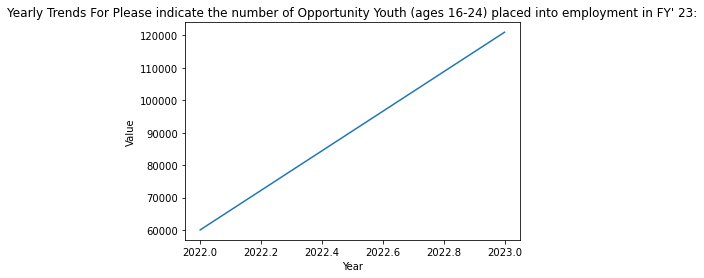

[2023, 2022]
[111000, 70000]


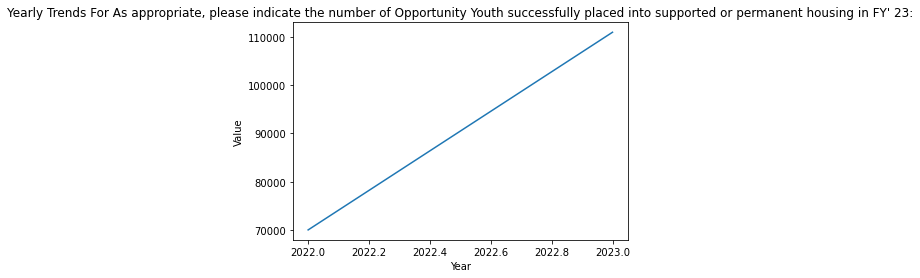

[2023, 2022]
[2100000, 300000]


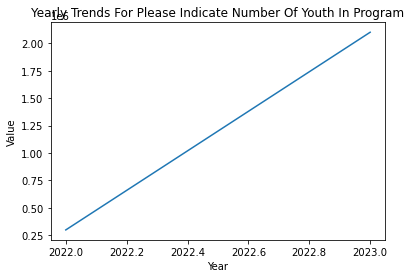

[2023, 2022]
[61000, 50000]


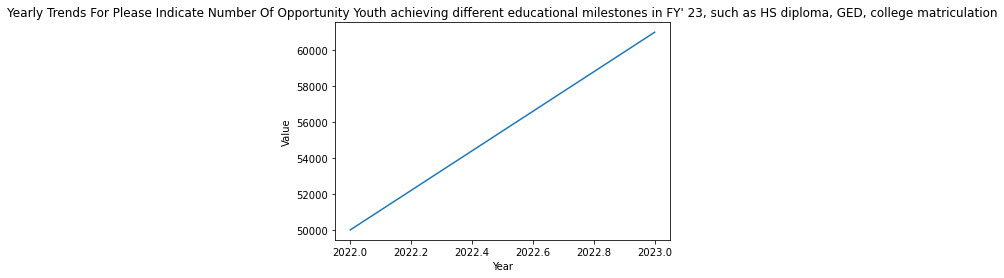

In [17]:
for i in range(len(overalldf['Question'])):
    keyarr = []
    plotarr = []
    for key in totaldict.keys():
        keyarr.append(key)
        plotarr.append(totaldict.get(key)[i])
    print(keyarr)
    print(plotarr)
    plt.plot(keyarr, plotarr)
    plt.title("Yearly Trends For " + str(overalldf['Question'][i]) + " Totals")
    plt.xlabel("Year")
    plt.ylabel("Value")
    plt.show()